# Support Vector Machine (SVM) Model


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Configure matplotlib for inline plotting
%matplotlib inline


In [2]:
# Load environment variables from .env file
load_dotenv()

# Get directory paths from environment variables
NOTEBOOKS_DIR_PATH = os.getenv('NOTEBOOKS_DIR_PATH')
DATASETS_DIR_PATH = os.getenv('DATASETS_DIR_PATH')
RAPORTS_DIR_PATH = os.getenv('RAPORTS_DIR_PATH')
MODELS_DIR_PATH = os.getenv('MODELS_DIR_PATH')

# Define file paths
processed_data_path = os.path.join('..', DATASETS_DIR_PATH, 'processed_data.csv')
models_dir = os.path.join('..', MODELS_DIR_PATH)

# Ensure the directory exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Load the processed data
df = pd.read_csv(processed_data_path)

## Data Preparation

We will prepare the data for modeling by separating the features and the target variable, and then splitting the data into training and testing sets.


In [3]:
# Separate features and target variable
X = df.drop('passed', axis=1)
y = df['passed']

# Split the data into training and testing sets
# We can set a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Support Vector Machine Model Training

We will use Grid Search with Cross-Validation to find the optimal hyperparameters (e.g., `C`, `kernel`, `gamma`).

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']  # Only applicable for some kernels
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(probability=True, random_state=0), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [5]:
# Best parameters from Grid Search
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [6]:
# Train the model with the best parameters
best_svm_model = grid.best_estimator_

# Evaluate the model
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score of the model: {f1:.4f}")

Accuracy of the model: 0.5966
F1 Score of the model: 0.7391


## Model Evaluation

We will evaluate the trained model using various metrics such as accuracy, confusion matrix, classification report, and ROC curve.

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 3 47]
 [ 1 68]]


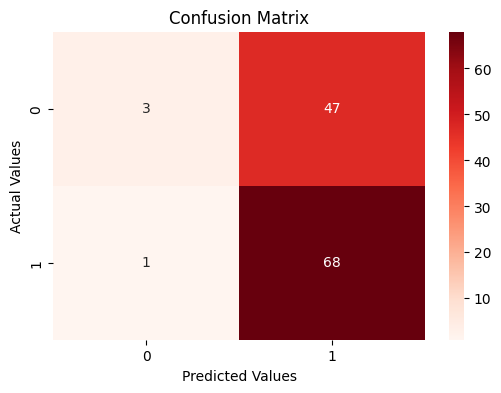

In [8]:
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.06      0.11        50
         1.0       0.59      0.99      0.74        69

    accuracy                           0.60       119
   macro avg       0.67      0.52      0.43       119
weighted avg       0.66      0.60      0.48       119



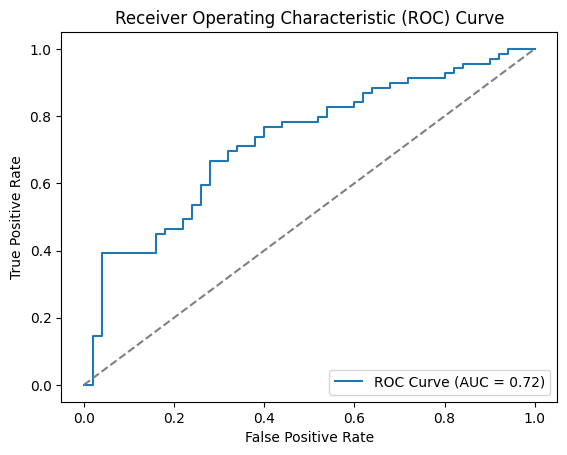

In [10]:
# ROC Curve and AUC
y_pred_proba = best_svm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Save the Trained Model
We can save the trained SVM model to a file for later use or deployment.

In [12]:
# Save the best SVM model
model_path = os.path.join(models_dir, 'svm_model.joblib')
joblib.dump(best_svm_model, model_path)
print(f"Model saved to {model_path}")

Model saved to ..\models\svm_model.joblib


## Conclusion

We have trained a Support Vector Machine model to predict whether a student will pass the final exam based on various features. Using Grid Search with Cross-Validation, we found the optimal hyperparameters and evaluated the model using accuracy, F1 score, confusion matrix, and ROC curve.

**Next Steps:**

- Analyze which features are most influential for the chosen kernel.
- Compare the performance of this model with other algorithms in the next notebook.
